# Importing Libraries

In [1]:
import numpy as np # Version '1.26.4'
import pandas as pd # Version '2.2.2'
import matplotlib # Version '3.9.0'
from matplotlib import pyplot as plt 
import seaborn as sns # Version '0.13.2'

import modules.functions as fnc

print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

Numpy 1.26.4
Pandas 2.2.2
Matplotlib 3.9.0
Seaborn 0.13.2


# Loading Dataset

In [2]:
df = pd.read_csv('../data/data.csv')
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.duplicated().any()

False

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [7]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

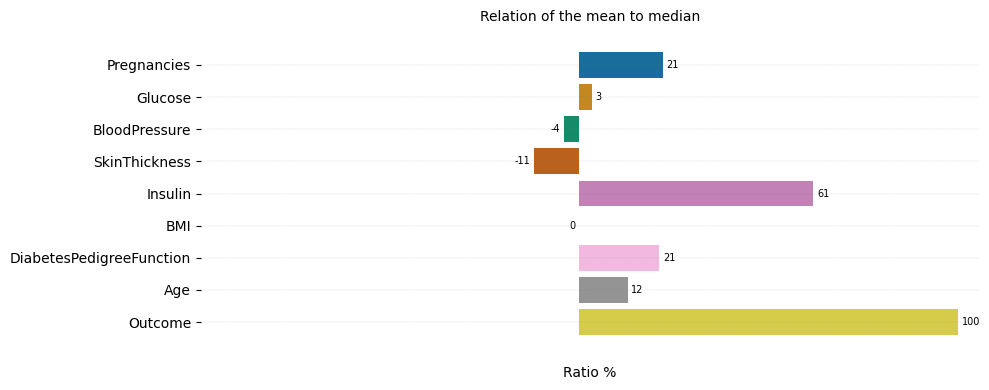

In [8]:
fnc.mean_to_median(df.iloc[:, :], (10,4))

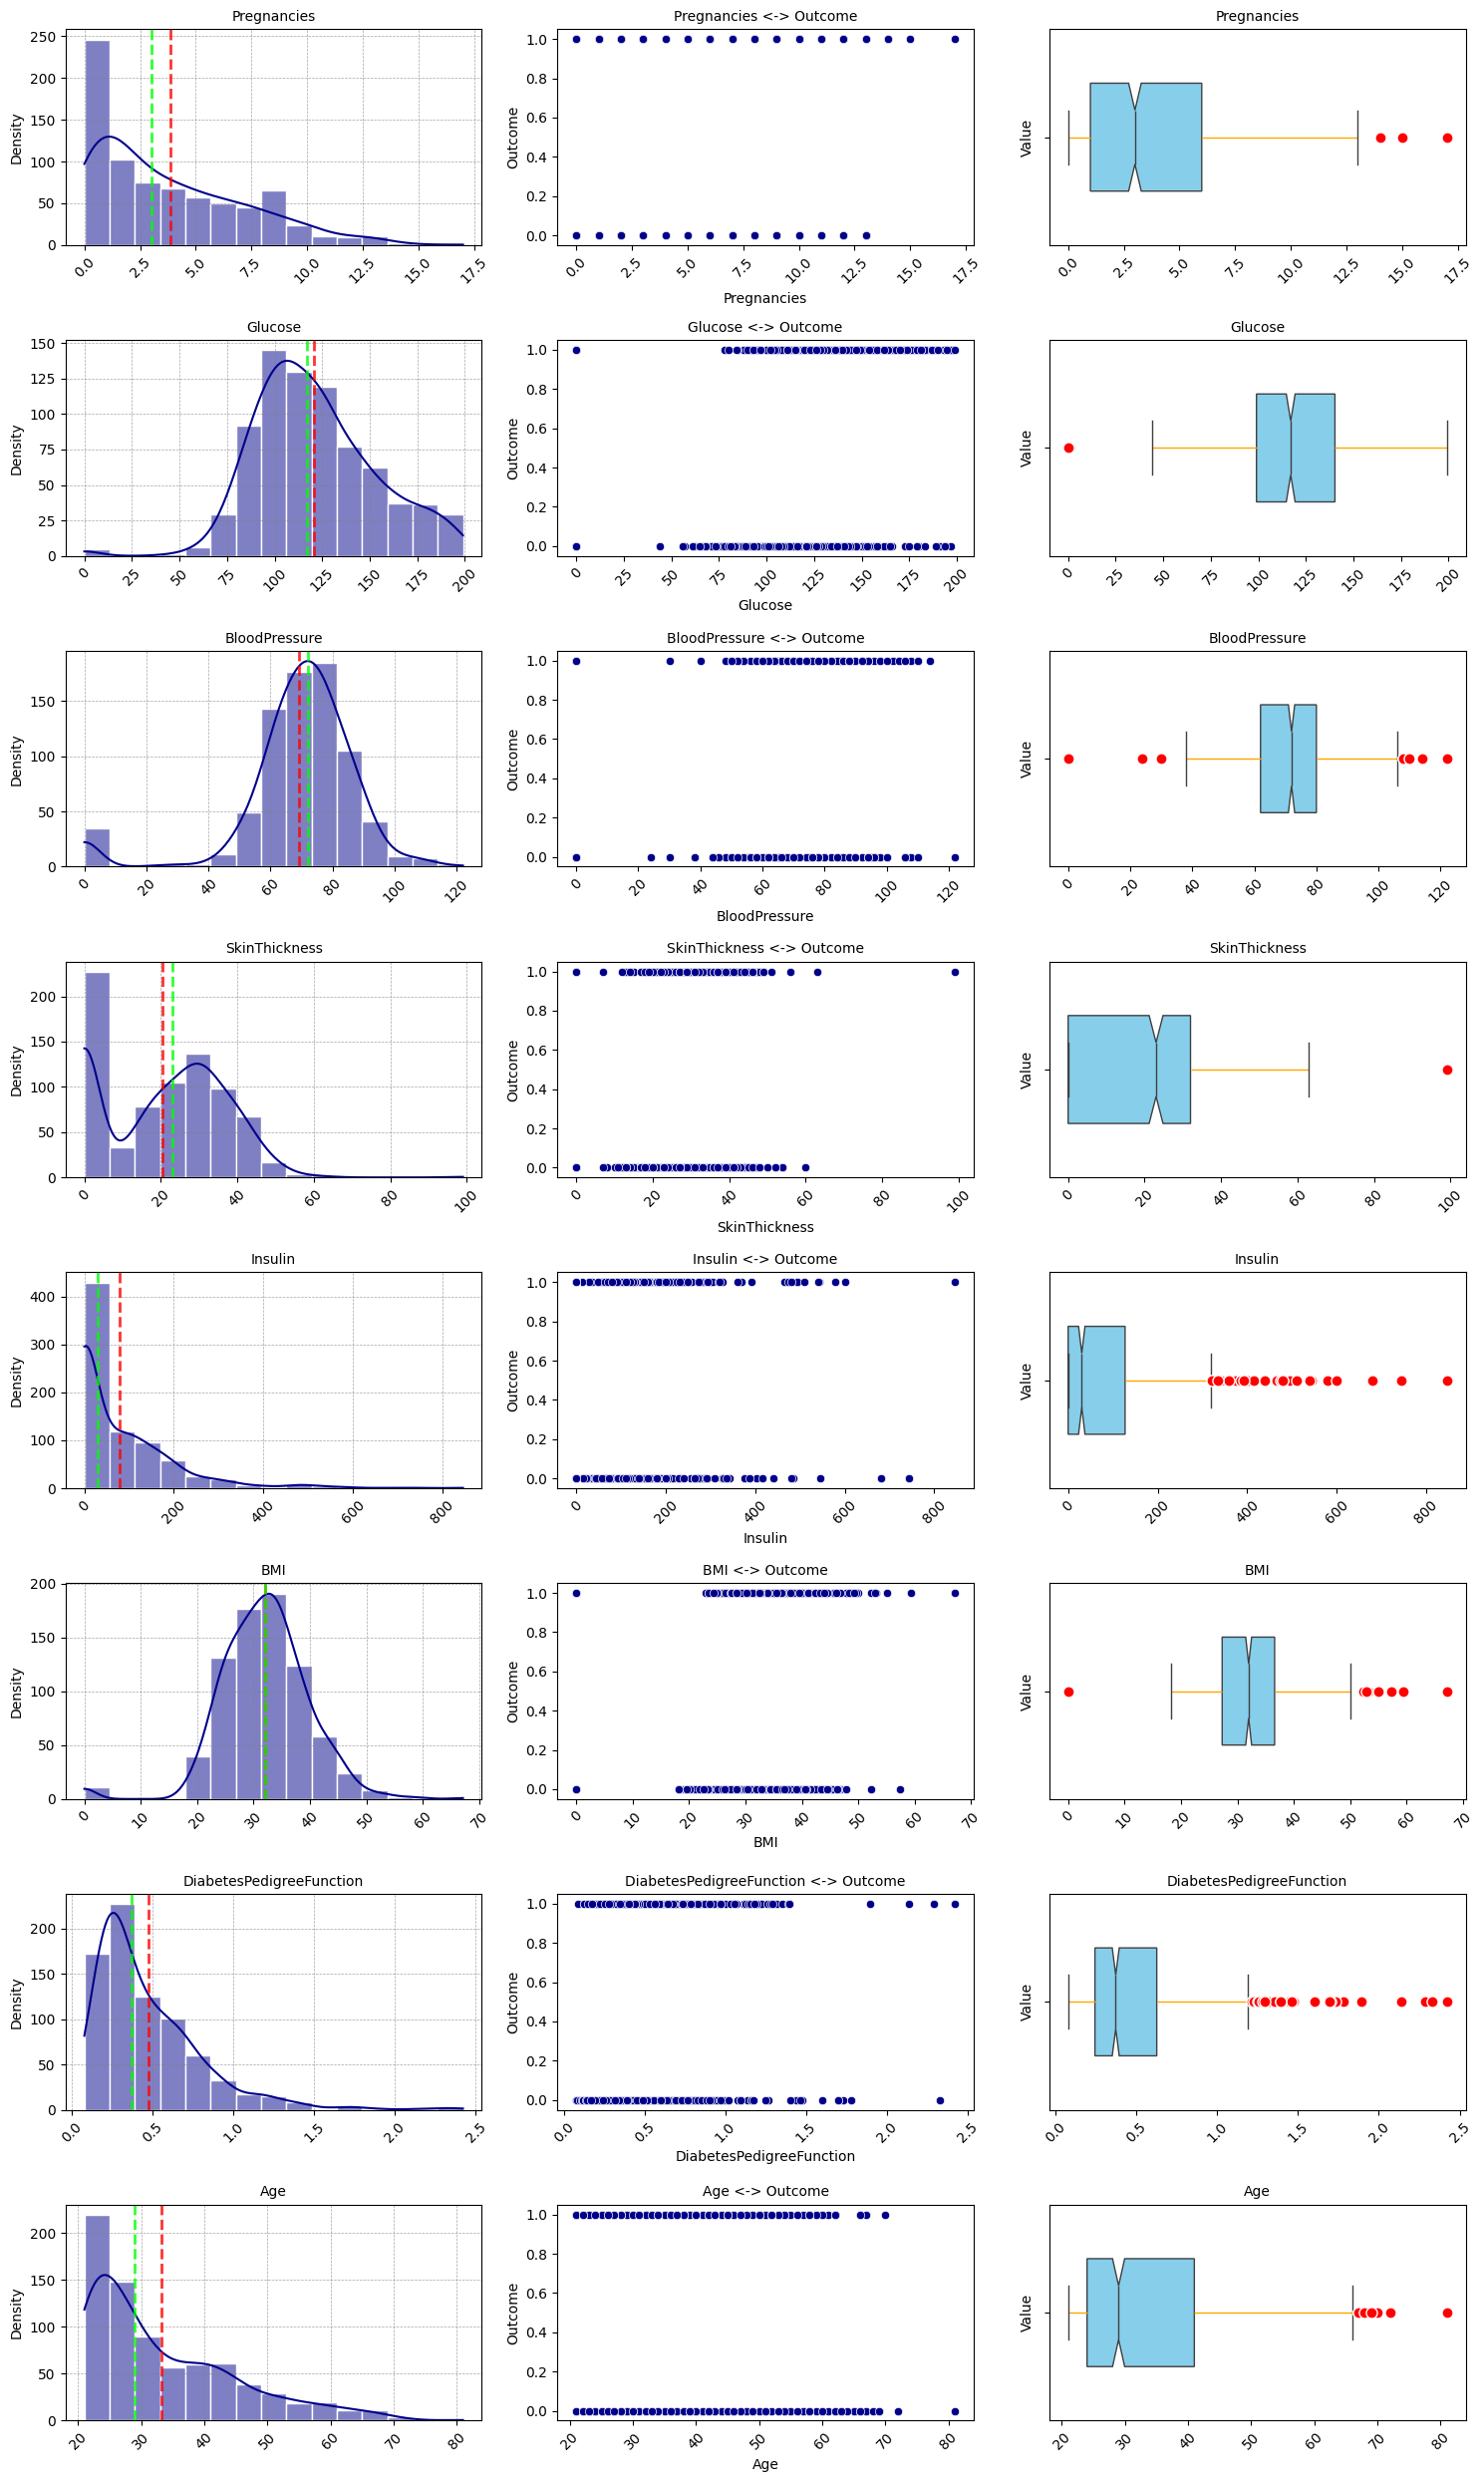

In [9]:
fnc.feature_plot(df, list(df.iloc[:, :-1]), 'Outcome', (15, 25))

In [10]:
df.groupby('Outcome')[['Age']].agg(['mean', 'median', 'max', 'min'])

Age               
              mean median max min
Outcome                          
0        31.190000   27.0  81  21
1        37.067164   36.0  70  21

In [11]:
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning

In [12]:
ser = (df == 0).sum().sort_values()
ser

DiabetesPedigreeFunction      0
Age                           0
Glucose                       5
BMI                          11
BloodPressure                35
Pregnancies                 111
SkinThickness               227
Insulin                     374
Outcome                     500
dtype: int64

In [13]:
ser.drop(['Pregnancies', 'Outcome'], inplace=True)

In [14]:
cols = ser[ser != 0].index.to_list()

df[cols] = np.where(df[cols] == 0, np.nan, df[cols])

In [15]:
def impute_val(data):
    impute = (data['mean'] - data['median']) / data['median'] * 100
    impute = np.where(impute <= 1.5, data['mean'], data['median'])
    return impute.round(2)

diabetes = df[df['Outcome'] == 1][cols].agg(['mean', 'median']).T
nondiabetes = df[df['Outcome'] == 0][cols].agg(['mean', 'median']).T

diabetes['impute'] = impute_val(diabetes)
nondiabetes['impute'] = impute_val(nondiabetes)

for col in cols:
    mask_diabetes = (df[col].isna()) & (df['Outcome'] == 1)
    mask_nondiabetes = (df[col].isna()) & (df['Outcome'] == 0)
    df.loc[mask_diabetes, col] = df.loc[mask_diabetes, col].fillna(diabetes.loc[col, 'impute'])
    df.loc[mask_nondiabetes, col] = df.loc[mask_nondiabetes, col].fillna(nondiabetes.loc[col, 'impute'])

In [16]:
ind1 = df[df['Pregnancies'] >= 15].index
df[df['Pregnancies'] >= 15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1


In [17]:
ind2 = df[(df['BloodPressure'] <= 40)|(df['BloodPressure'] >= 110)].index
df[(df['BloodPressure'] <= 40)|(df['BloodPressure'] >= 110)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
18,1,103.0,30.0,38.00,83.0,43.3,0.183,33,0
43,9,171.0,110.0,24.00,240.0,45.4,0.721,54,1
106,1,96.0,122.0,27.24,102.5,22.4,0.207,27,0
125,1,88.0,30.0,42.00,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.00,130.0,67.1,0.319,26,1
549,4,189.0,110.0,31.00,102.5,28.5,0.680,37,0
597,1,89.0,24.0,19.00,25.0,27.8,0.559,21,0
599,1,109.0,38.0,18.00,120.0,23.1,0.407,26,0
691,13,158.0,114.0,32.00,169.5,42.3,0.257,44,1


In [18]:
ind3 = df[df['SkinThickness'] >= 60].index
df[df['SkinThickness'] >= 60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99.0,169.5,34.7,0.575,62,1


In [19]:
ind4 = df[df['Insulin'] >= 600].index
df[df['Insulin'] >= 600]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52,1


In [20]:
ind5 = df[df['BMI'] >= 60].index
df[df['BMI'] >= 60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [21]:
ind6 = df[df['DiabetesPedigreeFunction'] >= 2].index
df[df['DiabetesPedigreeFunction'] >= 2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1


In [22]:
ind7 = df[df['Age'] >= 70].index
df[df['Age'] >= 70]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
453,2,119.0,70.88,27.24,102.5,19.6,0.832,72,0
459,9,134.0,74.00,33.00,60.0,25.9,0.460,81,0
666,4,145.0,82.00,18.00,169.5,32.5,0.235,70,1


In [23]:
arrays = [ind1, ind2, ind3, ind4, ind5, ind6, ind7]
common_elements = arrays[0]
for i in arrays[1:]:
    common_elements = np.intersect1d(common_elements, i)

In [24]:
common_elements

array([], dtype=int64)

In [25]:
df = df.drop([159, 579, 177, 459, 13])

# ReEDA

In [26]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.491928
Insulin                     0.380334
BMI                         0.310827
SkinThickness               0.288211
Age                         0.238723
Pregnancies                 0.224997
BloodPressure               0.174041
DiabetesPedigreeFunction    0.173688
dtype: float64

In [27]:
df.eq(0).sum()

Pregnancies                 110
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     499
dtype: int64

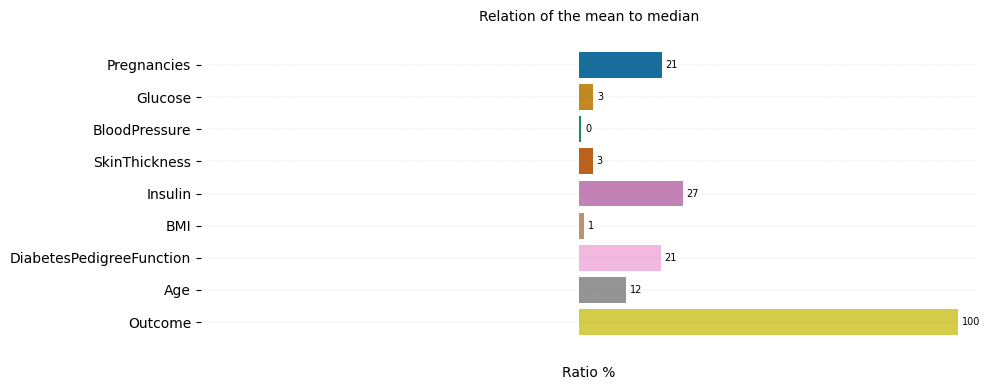

In [28]:
fnc.mean_to_median(df, (10,4), '../figures/Relation of mean to median.png')

In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.832241,121.410223,72.396907,29.007025,140.953473,32.386763,0.471602,33.098296,0.346003
std,3.336454,30.301473,12.060270,8.505404,85.607062,6.775589,0.332100,11.572528,0.476006
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,102.500000,27.500000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,169.500000,36.550000,0.626500,40.000000,1.000000
max,15.000000,199.000000,122.000000,63.000000,744.000000,59.400000,2.420000,72.000000,1.000000


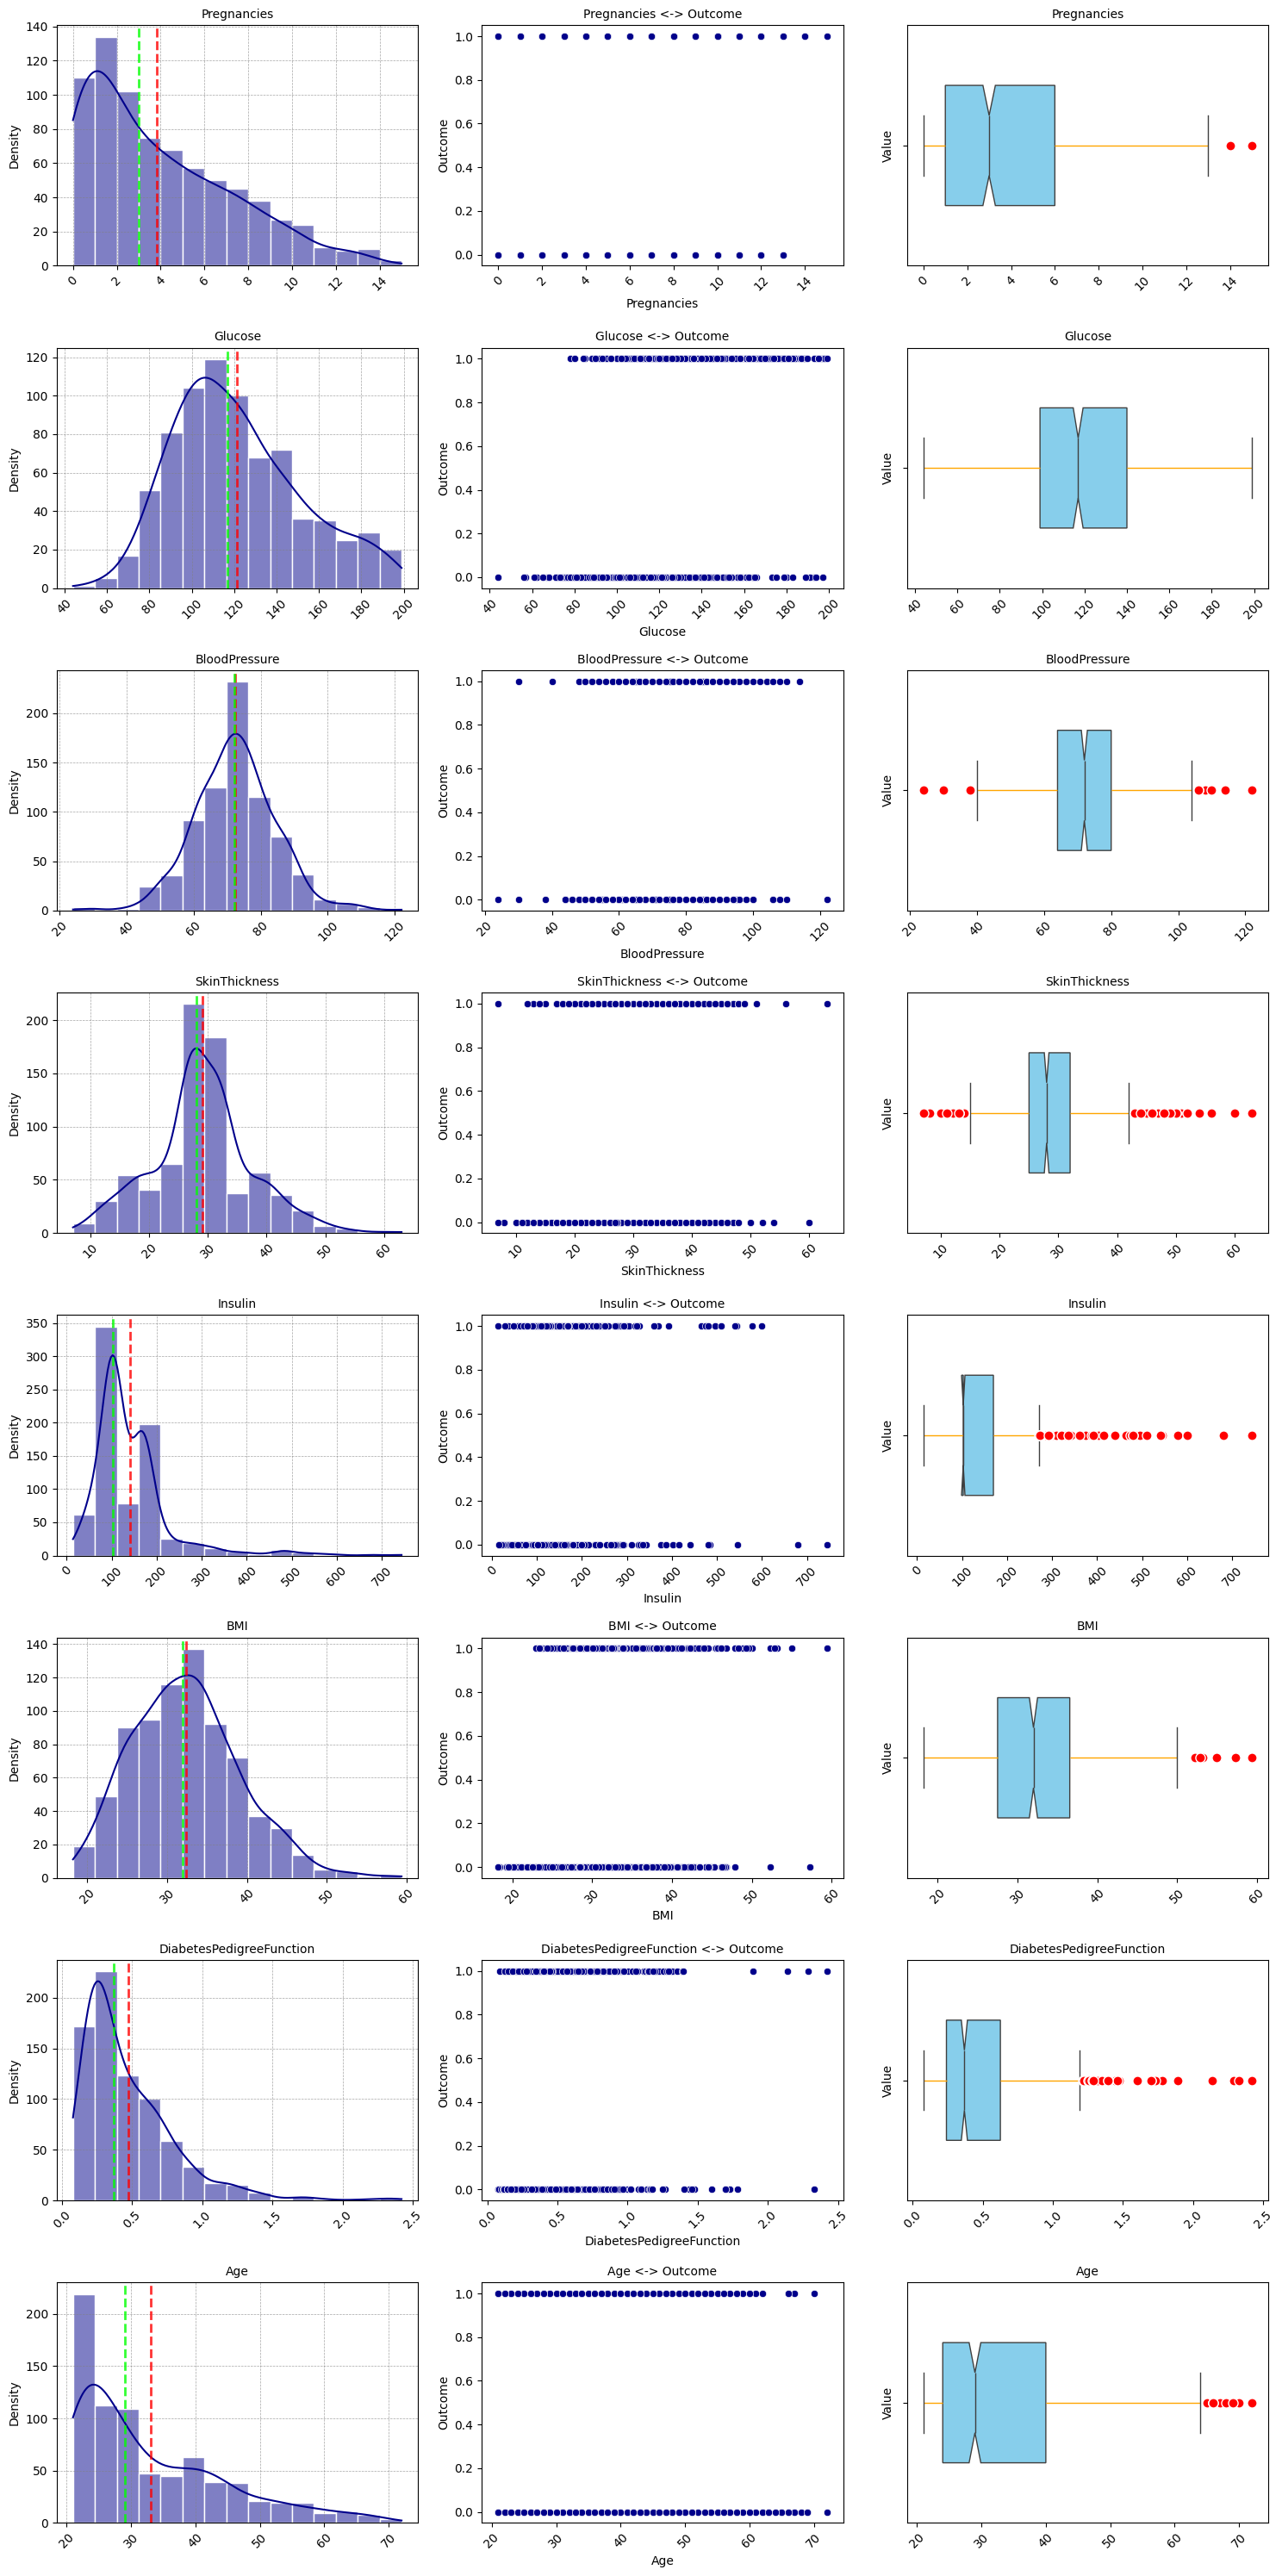

In [32]:
fnc.feature_plot(df, list(df.iloc[:, :-1]), 'Outcome', (15, 30), path='../figures/Feature plots.png')

# Data Export

In [ ]:
df.to_csv('../data/data_clean.csv', index=False)